In [96]:
import json
import networkx as nx
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from csv import reader
import numpy as np
import pandas as pd
import plotly.offline as py

Definisco i nodi

In [97]:

def load_nodes(path_nodes='graph_nodes.csv'):
    lista_nodi = dict()
    with open(path_nodes, 'r') as read_obj:
        csv_reader = reader(read_obj)
        header = next(csv_reader)
        # Check file as empty
        if header is not None:
            # Iterate over each row after the header in the csv
            for row in csv_reader:
                # row variable is a list that represents a row in csv
                lista_nodi[row[0]] = row[1]

    print("Numero nodi da rappresentare")
    print(len(lista_nodi))
    return lista_nodi

lista_nodi = load_nodes()
lista_nodi

Numero nodi da rappresentare
43


{'1': 'King Harald Fair-Hair',
 '2': 'Halfdan the Black',
 '3': 'Gudrod the Hunting King',
 '4': 'Halfdan the Mild and Meal-stingy',
 '5': 'Eystein Fart',
 '6': 'Olaf Wood-carver',
 '7': 'Hallfred',
 '8': 'Wife of Hallfred',
 '9': 'Hrafnkel',
 '10': 'Arnthrud',
 '11': 'man',
 '12': 'Oddbjorg Skjoldalfsdottir',
 '13': 'Thorir',
 '14': 'Asbjorn',
 '15': 'Frey',
 '16': 'Bjarni',
 '17': "Bjarni's wife",
 '18': 'Sam',
 '19': 'Eyvind',
 '20': "Sam's wife",
 '21': 'king of Greeks',
 '22': 'Freyfaxi',
 '23': 'Thorbjorn',
 '24': 'Einar',
 '25': 'shepherds',
 '26': 'mealtime servant',
 '27': 'milking women',
 '28': 'new shepherd',
 '29': 'Thorkel',
 '30': 'Thjostar',
 '31': 'Thorgeir',
 '32': 'Thormod',
 '33': 'Thordis',
 '34': 'Thorolf Skallagrimson',
 '35': "Eyvind's servant boy",
 '36': 'Servant woman',
 '37': 'Sighvat',
 '38': 'Snorri',
 '39': 'Hallstein',
 '40': 'Hrolf',
 '41': 'Thord ',
 '42': 'Halli',
 '43': 'Housekeeper'}

Carico gli archi

In [98]:
def load_edges(path_edges="graph.json"):
    with open(path_edges) as json_file:
        graph = json.load(json_file)

    lista_archi = dict()
    for arco in graph["links"]:
        lista_archi[(arco["source"], arco["target"], arco["action"])] = arco["action_description"]

    print("Archi da rappresentare")
    print(len(lista_archi))
    return lista_archi


lista_archi = load_edges()
lista_archi

Archi da rappresentare
96


{('1', '2', '1'): 'descent',
 ('2', '3', '1'): 'descent',
 ('3', '4', '1'): 'descent',
 ('4', '5', '1'): 'descent',
 ('5', '6', '1'): 'descent',
 ('7', '9', '9'): 'offer assistance',
 ('8', '7', '2'): 'marriage',
 ('9', '7', '1'): 'descent',
 ('9', '7', '8'): 'request assistance',
 ('9', '8', '1'): 'descent',
 ('9', '9', '24'): 'death_neutral',
 ('9', '13', '5'): 'inheritance',
 ('9', '14', '5'): 'inheritance',
 ('9', '15', '9'): 'offer assistance',
 ('9', '18', '7'): 'placed in command',
 ('9', '18', '20'): 'challenge',
 ('9', '18', '23'): 'conversation_neutral',
 ('9', '19', '21'): 'hostility_non-lethal',
 ('9', '19', '22'): 'hostility_lethal',
 ('9', '22', '10'): 'provide information',
 ('9', '22', '28'): 'ownership',
 ('9', '23', '19'): 'intervention',
 ('9', '24', '24'): 'death_neutral',
 ('9', '24', '22'): 'hostility_lethal',
 ('9', '24', '14'): 'accusation',
 ('9', '26', '8'): 'request assistance',
 ('9', '29', '8'): 'request assistance',
 ('9', '37', '15'): 'summons',
 ('9', '3

In [99]:
Num_nodes = 43

def load_nodes_label(path_nodes='graph_nodes.csv'):
    graph = None
    with open("graph.json") as json_file:
        graph = json.load(json_file)

    node_labels = dict()
    for node in graph["nodes"]:
        node_labels[(node['id'])] = node['label']

    print("Numero di label dei nodi da rappresentare")
    print(len(node_labels))

    return node_labels

lista_label = load_nodes_label()

lista_label

Numero di label dei nodi da rappresentare
43


{'1': 'King Harald Fair-Hair',
 '2': 'Halfdan the Black',
 '3': 'Gudrod the Hunting King',
 '4': 'Halfdan the Mild and Meal-stingy',
 '5': 'Eystein Fart',
 '6': 'Olaf Wood-carver',
 '7': 'Hallfred',
 '8': 'Wife of Hallfred',
 '9': 'Hrafnkel',
 '10': 'Arnthrud',
 '11': 'man',
 '12': 'Oddbjorg Skjoldalfsdottir',
 '13': 'Thorir',
 '14': 'Asbjorn',
 '15': 'Frey',
 '16': 'Bjarni',
 '17': "Bjarni's wife",
 '18': 'Sam',
 '19': 'Eyvind',
 '20': "Sam's wife",
 '21': 'king of Greeks',
 '22': 'Freyfaxi',
 '23': 'Thorbjorn',
 '24': 'Einar',
 '25': 'shepherds',
 '26': 'mealtime servant',
 '27': 'milking women',
 '28': 'new shepherd',
 '29': 'Thorkel',
 '30': 'Thjostar',
 '31': 'Thorgeir',
 '32': 'Thormod',
 '33': 'Thordis',
 '34': 'Thorolf Skallagrimson',
 '35': "Eyvind's servant boy",
 '36': 'Servant woman',
 '37': 'Sighvat',
 '38': 'Snorri',
 '39': 'Hallstein',
 '40': 'Hrolf',
 '41': 'Thord ',
 '42': 'Halli',
 '43': 'Housekeeper'}

Numero nodi da rappresentare:
43
-----------------------------
Numero archi da rappresentare:
96
Numero nodi nel grafo:
43
-----------------------
Numero archi nel grafo:
96


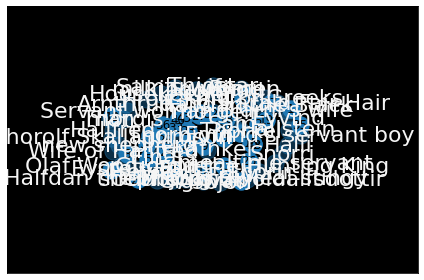

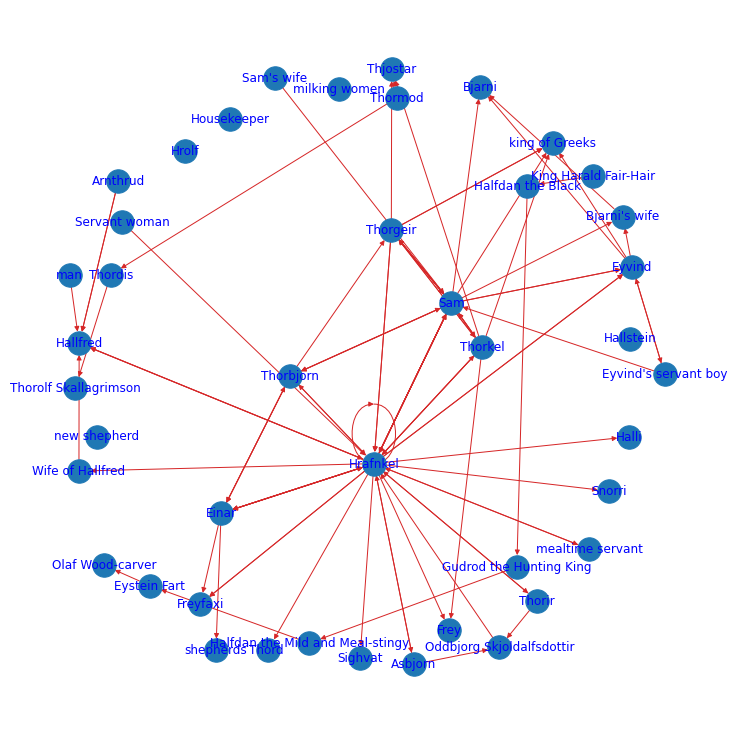

Numero nodi nel grafo:
43
-----------------------
Numero archi nel grafo:
96


In [105]:
G = nx.MultiDiGraph()

print("Numero nodi da rappresentare:")
print(len(lista_nodi))
print("-----------------------------")
print("Numero archi da rappresentare:")
print(len(lista_archi))


G.add_nodes_from(lista_nodi)

G.add_edges_from(lista_archi)

print("Numero nodi nel grafo:")
print(G.number_of_nodes())
print("-----------------------")
print("Numero archi nel grafo:")
print(G.number_of_edges())

sprial = nx.spiral_layout(G, resolution=2)
spring_pos = nx.spring_layout(G, seed = 10,k = 0.2, pos = sprial)
kamada = nx.kamada_kawai_layout(G, pos =spring_pos)
spring_pos = nx.spring_layout(G, seed = 110, k = 2.5, pos = kamada)


nx.draw_networkx_nodes(G, pos = spring_pos, alpha=0.4)
nx.draw_networkx_edges(G, pos = spring_pos, width = 0.5, arrowsize=1050)
nx.draw_networkx(G, pos = pos, with_labels=True)
nx.draw_networkx_labels(G, pos = spring_pos, labels=lista_label, font_size=22, font_color="whitesmoke")


plt.tight_layout()
plt.figure(3, figsize=(10, 10))
nx.draw(G, pos= spring_pos, with_labels=True, edge_color="tab:red", node_size=550, labels= lista_label,  font_color="b")
plt.show()
print("Numero nodi nel grafo:")
print(G.number_of_nodes())
print("-----------------------")
print("Numero archi nel grafo:")
print(G.number_of_edges())